In [3]:
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
import numpy as np
from matplotlib import pyplot




In [4]:
df = pd.read_csv("kc_house_prices/King_County_House_prices_dataset.csv")
del df["id"]
df["sqft_basement"] = df["sqft_basement"].transform(lambda x: float(str(x).replace('?',"0.0")))


In [43]:
for c in df.columns:
    uni = list(df[c].unique())
    uni = uni[:30]
    print(c + " " + str(uni))
    print("----")


date ['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014', '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015', '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014', '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014', '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014', '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014']
----
price [221900.0, 538000.0, 180000.0, 604000.0, 510000.0, 1230000.0, 257500.0, 291850.0, 229500.0, 323000.0, 662500.0, 468000.0, 310000.0, 400000.0, 530000.0, 650000.0, 395000.0, 485000.0, 189000.0, 230000.0, 385000.0, 2000000.0, 285000.0, 252700.0, 329000.0, 233000.0, 937000.0, 667000.0, 438000.0, 719000.0]
----
bedrooms [3, 2, 4, 5, 1, 6, 7, 8, 9, 11, 10, 33]
----
bathrooms [1.0, 2.25, 3.0, 2.0, 4.5, 1.5, 2.5, 1.75, 2.75, 3.25, 4.0, 3.5, 0.75, 4.75, 5.0, 4.25, 3.75, 1.25, 5.25, 6.0, 0.5, 5.5, 6.75, 5.75, 8.0, 7.5, 7.75, 6.25, 6.5]
----
sqft_living [1180, 2570, 770, 1960, 1680, 5420, 1715, 10

categorical:
+ id
+ waterfron
+ view
+ condition
+ grade

discrete:
+ num bedrooms
+ num bathrooms
+ sqft_living
+ sqft_lot
+ floors
+ condition
+ grade
+ sqft_above
+ sqft_ basement
+ yr_built

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,285.716581,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,439.819830,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


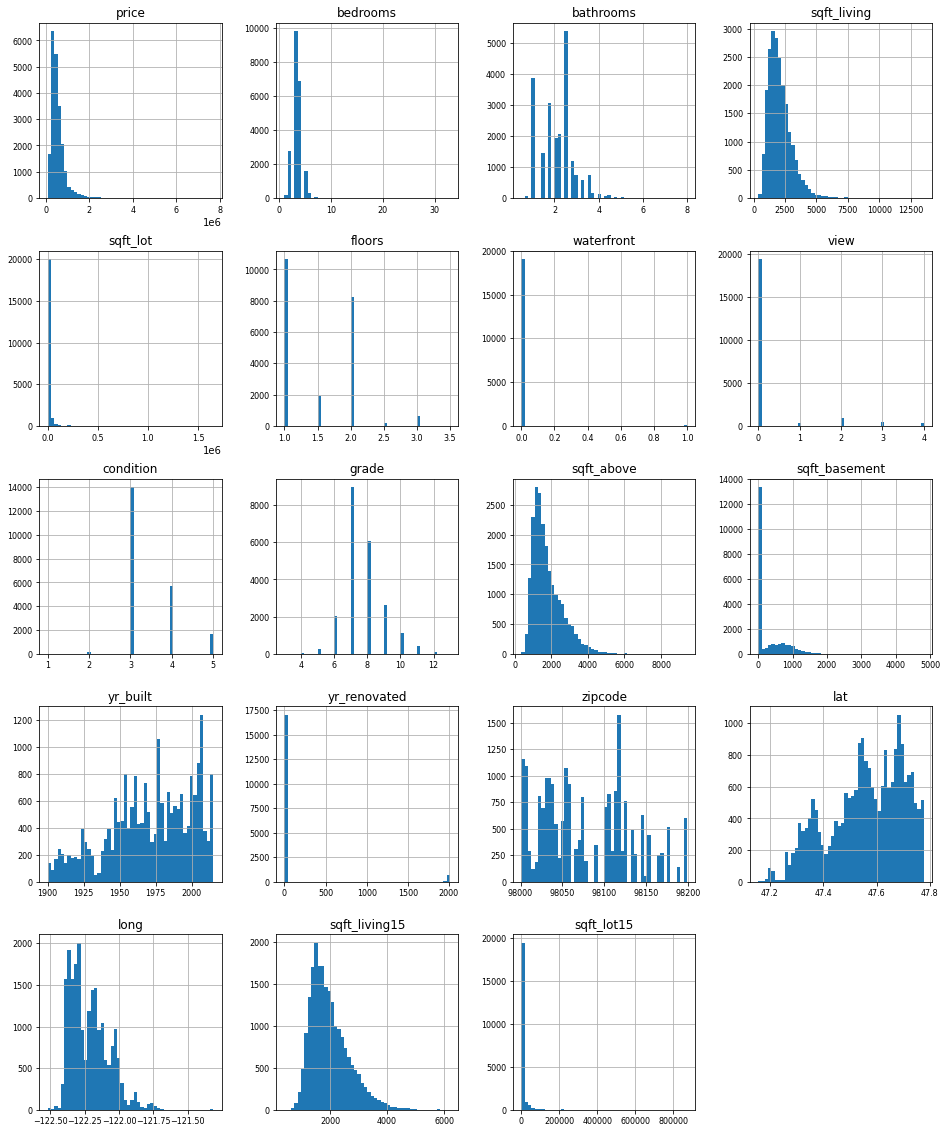

In [8]:
df_num = df.select_dtypes(include= ["float64", "int64"])
df_num.hist(figsize= (16,20), bins= 50, xlabelsize= 8, ylabelsize= 8);

In [9]:
#sns.pairplot(df_num[:10])

In [10]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [11]:
dfzipCode = df[["price","zipcode"]].sort_values("price",ascending=False)



dfzipCode["zipcode"] = dfzipCode["zipcode"].astype("category")

dfzipCodeCount = dfzipCode.groupby("zipcode").count().reset_index()
dfzipCodeSum = dfzipCode.groupby("zipcode").sum().reset_index()
dfzipCodeMean = dfzipCode.groupby("zipcode").mean().reset_index()

dfzipCodeCount.sort_values("price", ascending=False, inplace=True)

dfzipCode = dfzipCodeCount.merge(dfzipCodeSum, on = "zipcode", suffixes=["_count", "_sum"])
dfzipCode = dfzipCode.merge(dfzipCodeMean, on = "zipcode", suffixes=["","_mean"])
dfzipCode.rename(columns={"price": "price_mean"}, inplace=True)

dfzipCode


,zipcode,price_count,price_sum,price_mean
0,98103,602,352199365.0,5.850488e+05
1,98038,589,216216884.0,3.670915e+05
2,98115,583,361427439.0,6.199441e+05
3,98052,574,370370186.0,6.452442e+05
4,98117,553,318989649.0,5.768348e+05
...,...,...,...,...
65,98102,104,93559198.0,8.996077e+05
66,98010,100,42366599.0,4.236660e+05
67,98024,80,46889670.0,5.861209e+05
68,98148,57,16239790.0,2.849086e+05


In [12]:
px.bar(dfzipCode[:], x="zipcode" , y= "price_count", template="plotly_dark",title="zipcode - salesCount")



In [13]:
px.bar(dfzipCode[:], x="zipcode" , y= "price_sum", template="plotly_dark",title="zipcode - priceSum")


In [14]:
px.bar(dfzipCode[:], x="zipcode" , y= "price_mean", template="plotly_dark",title="zipcode - priceMean")

In [15]:
dfzipCode.corr()

,price_count,price_sum,price_mean
price_count,1.000000,0.708317,-0.150754
price_sum,0.708317,1.000000,0.450458
price_mean,-0.150754,0.450458,1.000000


In [16]:
dfzipCode = df[["price","zipcode"]].sort_values("price",ascending=False)
dfzipCode.groupby("zipcode").describe().sort_values(by = [("price","50%") ], ascending=False).round(2)

price                                                          \
         count        mean         std       min        25%        50%   
zipcode                                                                  
98039     50.0  2161300.00  1166904.40  787500.0  1402500.0  1895000.0   
98004    317.0  1356523.99   746094.07  425000.0   845000.0  1150000.0   
98040    282.0  1194873.64   607767.64  500000.0   822000.0   993750.0   
98112    269.0  1096239.01   594223.18  169317.0   680000.0   915000.0   
98005    168.0   810289.70   268979.17  400000.0   637775.0   765475.0   
...        ...         ...         ...       ...        ...        ...   
98188    136.0   289078.35   103106.58  110000.0   228750.0   264000.0   
98001    361.0   281194.87    98837.43  100000.0   215000.0   260000.0   
98032    125.0   251296.24    64705.43   85000.0   221700.0   249000.0   
98002    199.0   234284.04    52041.45   95000.0   199975.0   235000.0   
98168    269.0   240328.37    69984.82   78000.0   199950.0   235000.0   

                               
               75%        max  
zipcode                        
98039    2560000.0  6890000.0  
98004    1690000.0  7060000.0  
98040    1387500.0  5300000.0  
98112    1330000.0  3400000.0  
98005     911250.0  1960000.0  
...            ...        ...  
98188     335000.0   707000.0  
98001     320000.0   850000.0  
98032     285000.0   545000.0  
98002     268500.0   389000.0  
98168     285000.0   600000.0  

[70 rows x 8 columns]

In [17]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [18]:
# fig = px.scatter_geo(df, lat="lat",
#                      lon="long",
#                      color="price", # which column to use to set the color of markers
#                      #hover_name="country", # column added to hover information
#                      size="sqft_living") # size of markers
#                      #projection="orthographic")
# fig
# fig2 = px.scatter_geo(df, title='house Price Location', lat='lat', lon='long', projection="natural earth", color='price')
# fig2.update_layout(
#     title={
#         'text': "house Price Location",
#         'y':0.9,
#         'x':0.5,
#         'xanchor': 'center',
#         'yanchor': 'top'}, 
#     coloraxis_showscale=False
#         )
# fig2.show()


# Price Verteilung

In [19]:
df[["price"]].describe()

,price
count,2.159700e+04
mean,5.402966e+05
std,3.673681e+05
min,7.800000e+04
25%,3.220000e+05
50%,4.500000e+05
75%,6.450000e+05
max,7.700000e+06


In [20]:
# df[["price"]].skew()
# px.histogram(np.log(df[["price"]]), x = "price", template="plotly_dark")
# df["price"] = np.log(df["price"])

In [21]:
px.histogram(df, x="price", template="plotly_dark")

In [22]:
px.box(df, x="price",template="plotly_dark", points= "all")#, points="all")
#px.box(df_tips, x='sex', y='tip', points='all')

In [23]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [24]:
#sns.pairplot(df[["price", "bedrooms", "bathrooms","sqft_living", "sqft_lot", "yr_renovated"]][:1000])

In [25]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.321108,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.297229,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.278485,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.428660,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,0.088213,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,0.271689,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,0.249727,-0.146896,1.000000,0.756073,0.165843,0.447865,0.016669,-0.185771,0.113575,0.200341,0.713867,0.120981


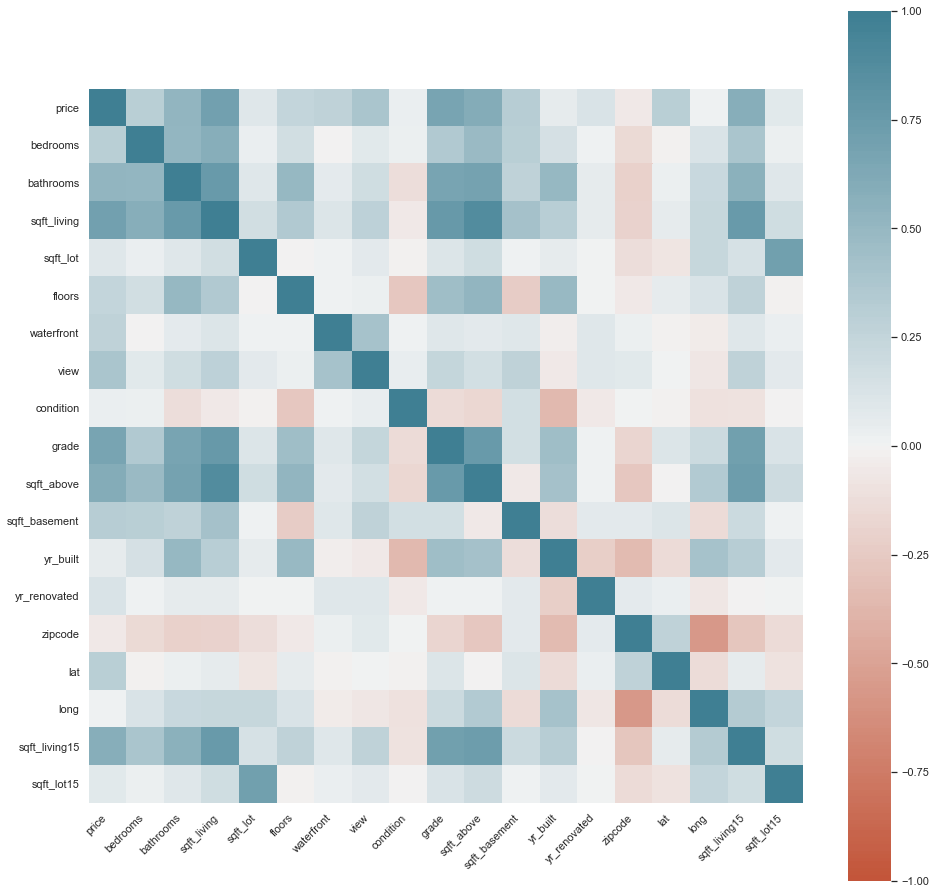

In [26]:
corr = df.corr()

sns.set(rc={"figure.figsize":(16,16)})

#fig, ax = pyplot.subplot(figsize = 10.0 ,10.0)

ax = sns.heatmap(
    corr,
    vmin = -1, vmax= +1, center = 0,
    cmap = sns.diverging_palette(20, 220, n=200),
    square= True
)
ax.set_xticklabels(

    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [27]:
dfr2 = df.corr().transform(lambda x: x**2)
dfr2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.095350,0.276577,0.492688,0.008078,0.065948,0.076339,0.156605,0.001300,0.446158,0.366470,0.103110,0.002911,1.679597e-02,0.002852,0.094060,0.000486,3.425073e-01,0.006863
bedrooms,0.095350,1.000000,0.264718,0.334329,0.001054,0.031664,0.000006,0.006166,0.000702,0.127137,0.229811,0.088345,0.024233,3.420613e-04,0.023744,0.000099,0.017438,1.547686e-01,0.000942
bathrooms,0.276577,0.264718,1.000000,0.571170,0.007810,0.252589,0.004527,0.034764,0.015997,0.443340,0.471513,0.077554,0.257225,2.606057e-03,0.041937,0.000590,0.050581,3.247676e-01,0.007797
sqft_living,0.492688,0.334329,0.571170,1.000000,0.030086,0.125283,0.012151,0.079825,0.003534,0.581832,0.768161,0.183750,0.101221,3.098023e-03,0.039921,0.002720,0.058184,5.721433e-01,0.033982
sqft_lot,0.008078,0.001054,0.007810,0.030086,1.000000,0.000023,0.000536,0.005670,0.000078,0.013163,0.033907,0.000226,0.002803,2.037059e-05,0.016792,0.007313,0.053004,2.095620e-02,0.515817
floors,0.065948,0.031664,0.252589,0.125283,0.000023,1.000000,0.000479,0.000809,0.069736,0.210492,0.274564,0.058499,0.239310,1.249845e-05,0.003545,0.002424,0.015862,7.845695e-02,0.000115
waterfront,0.076339,0.000006,0.004527,0.012151,0.000536,0.000479,1.000000,0.165368,0.000311,0.007636,0.005695,0.007782,0.000680,7.611460e-03,0.000965,0.000163,0.001589,7.896146e-03,0.001024
view,0.156605,0.006166,0.034764,0.079825,0.005670,0.000809,0.165368,1.000000,0.002092,0.062363,0.027655,0.073815,0.002977,1.019366e-02,0.007272,0.000038,0.006067,7.815452e-02,0.005378
condition,0.001300,0.000702,0.015997,0.003534,0.000078,0.069736,0.000311,0.002092,1.000000,0.021578,0.025250,0.028386,0.130748,3.826452e-03,0.000008,0.000228,0.011210,8.662434e-03,0.000010
grade,0.446158,0.127137,0.443340,0.581832,0.013163,0.210492,0.007636,0.062363,0.021578,1.000000,0.571646,0.027504,0.200583,2.778573e-04,0.034511,0.012899,0.040137,5.096063e-01,0.014636


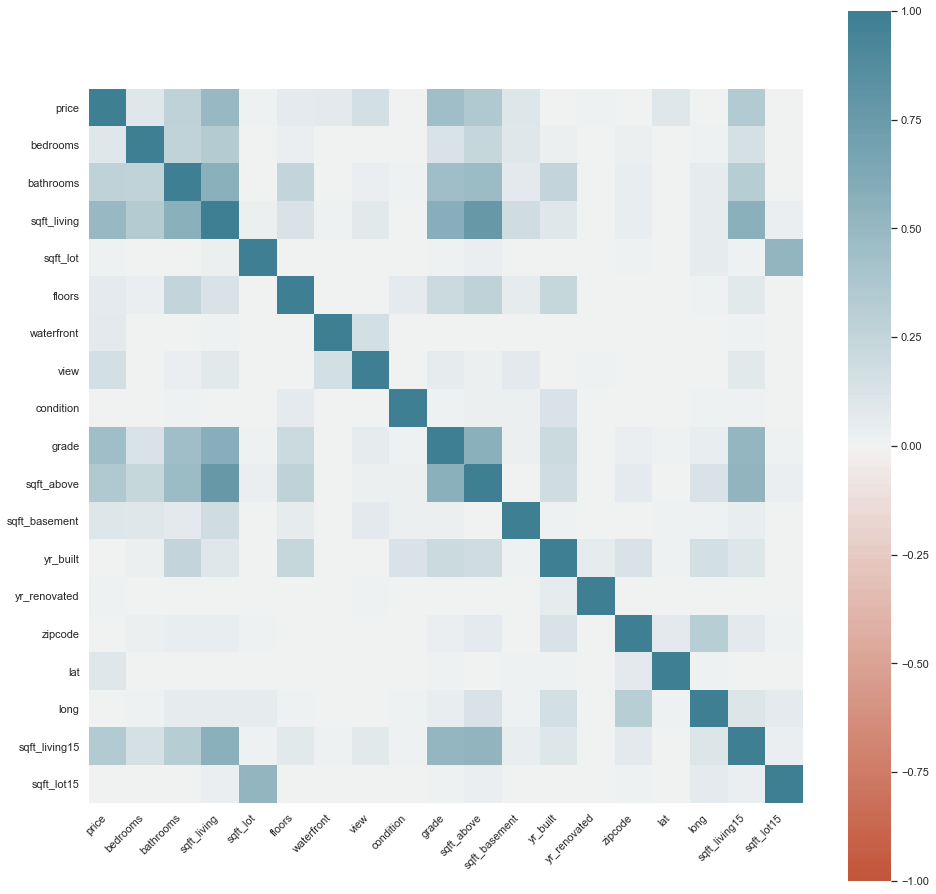

In [28]:
sns.set(rc={"figure.figsize":(16,16)})

#fig, ax = pyplot.subplot(figsize = 10.0 ,10.0)

ax = sns.heatmap(
    dfr2,
    vmin = -1, vmax= +1, center = 0,
    cmap = sns.diverging_palette(20, 220, n=200),
    square= True
)
ax.set_xticklabels(

    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [29]:
dfr2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.095350,0.276577,0.492688,0.008078,0.065948,0.076339,0.156605,0.001300,0.446158,0.366470,0.103110,0.002911,1.679597e-02,0.002852,0.094060,0.000486,3.425073e-01,0.006863
bedrooms,0.095350,1.000000,0.264718,0.334329,0.001054,0.031664,0.000006,0.006166,0.000702,0.127137,0.229811,0.088345,0.024233,3.420613e-04,0.023744,0.000099,0.017438,1.547686e-01,0.000942
bathrooms,0.276577,0.264718,1.000000,0.571170,0.007810,0.252589,0.004527,0.034764,0.015997,0.443340,0.471513,0.077554,0.257225,2.606057e-03,0.041937,0.000590,0.050581,3.247676e-01,0.007797
sqft_living,0.492688,0.334329,0.571170,1.000000,0.030086,0.125283,0.012151,0.079825,0.003534,0.581832,0.768161,0.183750,0.101221,3.098023e-03,0.039921,0.002720,0.058184,5.721433e-01,0.033982
sqft_lot,0.008078,0.001054,0.007810,0.030086,1.000000,0.000023,0.000536,0.005670,0.000078,0.013163,0.033907,0.000226,0.002803,2.037059e-05,0.016792,0.007313,0.053004,2.095620e-02,0.515817
floors,0.065948,0.031664,0.252589,0.125283,0.000023,1.000000,0.000479,0.000809,0.069736,0.210492,0.274564,0.058499,0.239310,1.249845e-05,0.003545,0.002424,0.015862,7.845695e-02,0.000115
waterfront,0.076339,0.000006,0.004527,0.012151,0.000536,0.000479,1.000000,0.165368,0.000311,0.007636,0.005695,0.007782,0.000680,7.611460e-03,0.000965,0.000163,0.001589,7.896146e-03,0.001024
view,0.156605,0.006166,0.034764,0.079825,0.005670,0.000809,0.165368,1.000000,0.002092,0.062363,0.027655,0.073815,0.002977,1.019366e-02,0.007272,0.000038,0.006067,7.815452e-02,0.005378
condition,0.001300,0.000702,0.015997,0.003534,0.000078,0.069736,0.000311,0.002092,1.000000,0.021578,0.025250,0.028386,0.130748,3.826452e-03,0.000008,0.000228,0.011210,8.662434e-03,0.000010
grade,0.446158,0.127137,0.443340,0.581832,0.013163,0.210492,0.007636,0.062363,0.021578,1.000000,0.571646,0.027504,0.200583,2.778573e-04,0.034511,0.012899,0.040137,5.096063e-01,0.014636


In [30]:
# print(dfr2.price.index)
# print(dfr2.price.values)

for c in dfr2:
    if c not in ["id", "lat", "long"]:
        #print(c)
        s = dfr2[c].sort_values(ascending=False)[1:7]
        #print(s.index)
        out = c + ": "
        for i, e in zip(list(s.index),list(s.values)):
            out += "\t" + str(i) + " " + str(round(e,5)) + "; "
        print(out + "\n")

price: 	sqft_living 0.49269; 	grade 0.44616; 	sqft_above 0.36647; 	sqft_living15 0.34251; 	bathrooms 0.27658; 	view 0.15661; 

bedrooms: 	sqft_living 0.33433; 	bathrooms 0.26472; 	sqft_above 0.22981; 	sqft_living15 0.15477; 	grade 0.12714; 	price 0.09535; 

bathrooms: 	sqft_living 0.57117; 	sqft_above 0.47151; 	grade 0.44334; 	sqft_living15 0.32477; 	price 0.27658; 	bedrooms 0.26472; 

sqft_living: 	sqft_above 0.76816; 	grade 0.58183; 	sqft_living15 0.57214; 	bathrooms 0.57117; 	price 0.49269; 	bedrooms 0.33433; 

sqft_lot: 	sqft_lot15 0.51582; 	long 0.053; 	sqft_above 0.03391; 	sqft_living 0.03009; 	sqft_living15 0.02096; 	zipcode 0.01679; 

floors: 	sqft_above 0.27456; 	bathrooms 0.25259; 	yr_built 0.23931; 	grade 0.21049; 	sqft_living 0.12528; 	sqft_living15 0.07846; 

waterfront: 	view 0.16537; 	price 0.07634; 	sqft_living 0.01215; 	sqft_living15 0.0079; 	sqft_basement 0.00778; 	grade 0.00764; 

view: 	waterfront 0.16537; 	price 0.15661; 	sqft_living 0.07982; 	sqft_living15 0.07815

In [31]:
#px.bar(dfr2,

# One hot encoding

In [32]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [33]:
for c in df.columns:
    print(c + f" \t" + str(df[c].nunique()))

date 	372
price 	3622
bedrooms 	12
bathrooms 	29
sqft_living 	1034
sqft_lot 	9776
floors 	6
waterfront 	2
view 	5
condition 	5
grade 	11
sqft_above 	942
sqft_basement 	303
yr_built 	116
yr_renovated 	70
zipcode 	70
lat 	5033
long 	751
sqft_living15 	777
sqft_lot15 	8682


In [34]:
# def oneHot(df, columnName):
#     dummies = pd.get_dummies(df[columnName], prefix = columnName, drop_first=True)
#     for c in dummies.columns: dummies.rename(columns={c:c.replace(".","_")}, inplace=True)
#     df = df.drop([columnName], axis=1)
#     df = pd.concat([df,dummies], axis=1)
#     return df

id
waterfron
view
condition
grade
discrete:

num bedrooms
num bathrooms
sqft_living
sqft_lot
floors
condition
grade
sqft_above
sqft_ basement
yr_built

+ bedrooms
+ bathrooms
+ floors
+ waterfront
+ view
+ condition
+ grade
+ yr_built
+ yr_renovated
+ zipcode


In [35]:
#cats = ["bedrooms","bathrooms","floors","waterfront","view","condition","grade","yr_built","yr_renovated","zipcode"]
# #for c in cats: df = oneHot(df, c)


In [36]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [37]:
# cols = [i for i in df.columns if i not in ["price"]]
# s = cols[0]
# print(cols)
# print("------")
# for i in cols[1:]: s += "+"+i.replace(".","_")
# s

In [38]:
import statsmodels.formula.api as smf
df.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [39]:
#model = smf.ols(formula="price~" +s, data=df).fit()
df1 = df.copy()

cols = ["date", 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built',  'zipcode', 
       'sqft_living15', 'sqft_lot15']
cats = ["bedrooms","bathrooms","floors","waterfront","view","condition","grade","zipcode"]

#R2 0.852 - 0.849
# cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#        'floors', 'condition', 'grade',
#         'zipcode', "sqft_basement","view",
#        'sqft_living15', 'sqft_lot15']
# cats = ["bedrooms","bathrooms","floors","waterfront","view","condition","grade","zipcode"]

s=""
for c in cols:
    if c not in cats and c != "price":
        s += c +"+"
    else:
        if c != "price":
            s+= "C({:})+".format(c)
s=s[:-1]
print(s)
#waterfron 0.01
#date 0.005
#view 0.025
#yr_built 0.003
#yr_renovated 0.006 
#sqft_above 0.0
#sqft_basement 0.026

#model = smf.ols(formula="price~sqft_living+sqft_above+C(condition)+C(grade)+C(bedrooms)+C(bathrooms)+C(zipcode)", data=df1).fit()

model = smf.ols(formula="price~"+s, data=df1).fit()

results = model.summary()

results

date+C(bedrooms)+C(bathrooms)+sqft_living+sqft_lot+C(floors)+C(view)+C(condition)+C(grade)+sqft_above+sqft_basement+yr_built+C(zipcode)+sqft_living15+sqft_lot15


+05      0.036      0.972   -2.92e+05    3.03e+05
date[T.7/22/2014]    -1561.9888   1.52e+05     -0.010      0.992   -2.99e+05    2.96e+05
date[T.7/23/2014]     5815.4280   1.52e+05      0.038      0.969   -2.92e+05    3.03e+05
date[T.7/24/2014]     2915.6331   1.52e+05      0.019      0.985   -2.95e+05       3e+05
date[T.7/25/2014]     2.328e+04   1.52e+05      0.153      0.878   -2.74e+05    3.21e+05
date[T.7/26/2014]      4.81e+04    1.6e+05      0.300      0.764   -2.66e+05    3.62e+05
date[T.7/27/2014]     7.645e+04   2.14e+05      0.358      0.721   -3.42e+05    4.95e+05
date[T.7/28/2014]    -1.657e+04   1.52e+05     -0.109      0.913   -3.14e+05    2.81e+05
date[T.7/29/2014]     -200.6710   1.52e+05     -0.001      0.999   -2.97e+05    2.97e+05
date[T.7/3/2014]     -8403.2981   1.52e+05     -0.055      0.956   -3.06e+05     2.9e+05
date[T.7/30/2014]    -2736.2321   1.52e+05     -0.018      0.986   -3.01e+05    2.95e+05
date[T.7/31/2014]     1.095e+04   1.52e+05      0.072      0.943   -2.87e+05    3.09e+05
date[T.7/4/2014]      5.871e+04   1.85e+05      0.317      0.751   -3.04e+05    4.21e+05
date[T.7/5/2014]      1.579e+05   1.63e+05      0.968      0.333   -1.62e+05    4.78e+05
date[T.7/6/2014]     -2.545e+04   1.74e+05     -0.146      0.884   -3.67e+05    3.16e+05
date[T.7/7/2014]      1.939e+04   1.52e+05      0.128      0.898   -2.78e+05    3.17e+05
date[T.7/8/2014]       1.31e+04   1.52e+05      0.086      0.931   -2.84e+05     3.1e+05
date[T.7/9/2014]      7794.4861   1.52e+05      0.051      0.959   -2.89e+05    3.05e+05
date[T.8/1/2014]      1.868e+04   1.52e+05      0.123      0.902   -2.79e+05    3.16e+05
date[T.8/10/2014]     1.096e+04   1.74e+05      0.063      0.950   -3.31e+05    3.53e+05
date[T.8/11/2014]     2.736e+04   1.52e+05      0.180      0.857    -2.7e+05    3.25e+05
date[T.8/12/2014]     1.874e+04   1.52e+05      0.123      0.902   -2.79e+05    3.16e+05
date[T.8/13/2014]     1.453e+04   1.52e+05      0.096      0.924   -2.83e+05    3.12e+05
date[T.8/14/2014]     5668.6002   1.52e+05      0.037      0.970   -2.92e+05    3.03e+05
date[T.8/15/2014]     2.626e+04   1.52e+05      0.172      0.863   -2.72e+05    3.25e+05
date[T.8/16/2014]    -3.333e+04   1.69e+05     -0.197      0.844   -3.64e+05    2.98e+05
date[T.8/17/2014]     -3.95e+04   1.69e+05     -0.234      0.815    -3.7e+05    2.91e+05
date[T.8/18/2014]     1.041e+04   1.52e+05      0.069      0.945   -2.87e+05    3.08e+05
date[T.8/19/2014]     3.364e+04   1.52e+05      0.222      0.825   -2.64e+05    3.31e+05
date[T.8/2/2014]      1.893e+04   1.65e+05      0.114      0.909   -3.05e+05    3.43e+05
date[T.8/20/2014]     6592.2436   1.52e+05      0.043      0.965   -2.91e+05    3.04e+05
date[T.8/21/2014]     1300.8739   1.52e+05      0.009      0.993   -2.96e+05    2.99e+05
date[T.8/22/2014]    -1.484e+04   1.52e+05     -0.098      0.922   -3.12e+05    2.83e+05
date[T.8/23/2014]     3.561e+04   1.61e+05      0.221      0.825   -2.81e+05    3.52e+05
date[T.8/24/2014]    -1875.4286   1.85e+05     -0.010      0.992   -3.64e+05    3.61e+05
date[T.8/25/2014]     2.609e+04   1.52e+05      0.172      0.863   -2.71e+05    3.23e+05
date[T.8/26/2014]     1.225e+04   1.52e+05      0.081      0.936   -2.85e+05     3.1e+05
date[T.8/27/2014]    -9975.8900   1.52e+05     -0.066      0.948   -3.07e+05    2.87e+05
date[T.8/28/2014]     1.067e+04   1.52e+05      0.070      0.944   -2.87e+05    3.09e+05
date[T.8/29/2014]      1.25e+04   1.52e+05      0.082      0.935   -2.86e+05    3.11e+05
date[T.8/3/2014]     -1.004e+04   2.14e+05     -0.047      0.963   -4.29e+05    4.09e+05
date[T.8/30/2014]     9987.0215   2.14e+05      0.047      0.963   -4.09e+05    4.29e+05
date[T.8/31/2014]      1.55e+04   1.74e+05      0.089      0.929   -3.26e+05    3.57e+05
date[T.8/4/2014]      1.435e+04   1.52e+05      0.094      0.925   -2.83e+05    3.12e+05
date[T.8/5/2014]      1.431e+04   1.52e+05      0.094      0.925   -2.83e+05    3.12e+05
date[T.8/6/2014]     -2019.5611   

In [40]:
import pickle

l = model.params.to_list()
i = model.params.index.to_list()
pickleData = [(m,n) for m,n in zip(i,l)]

fh = open("data_params.pkl","wb")
pickle.dump(pickleData,fh)
fh.close()

In [41]:
type(df.at[2,"sqft_basement"])
type(df.at[2,"bathrooms"])
df.sqft_basement.unique()


array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  710.,
        840.,  380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,
        120.,  650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,
        750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,
        850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,  580.,
       2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530., 1450.,
       1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,  660.,
       1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,  350.,
        935., 1370.,  980., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

In [42]:
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.0,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
